In [2]:
import matplotlib.pyplot as plt
import numpy as np

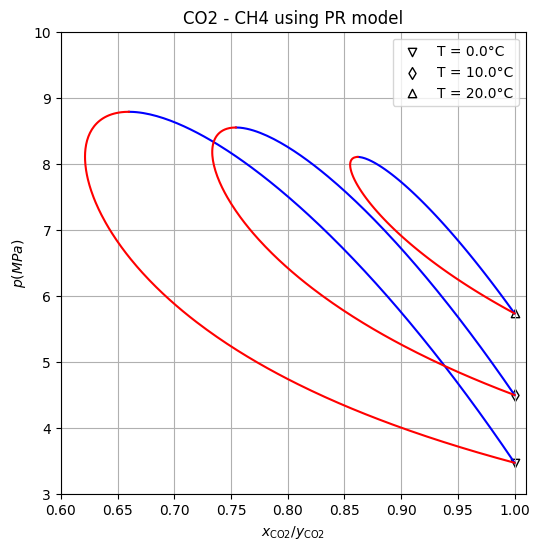

In [107]:
#!/usr/bin/python
#Modify system path
import sys
sys.path.insert(0,'../pycThermopack/')
# Importing pyThermopack
from thermopack.cubic import cubic
# Importing Numpy (math, arrays, etc...)
import numpy as np
# Importing Matplotlib (plotting)
import matplotlib.pyplot as plt

Temps = [273.15, 283.15, 293.15]
markers = ['v', 'd', '^']
plt.figure(1,(6,6))

srk3 = cubic("CO2,C1", "PR")
for Temp in Temps:
    lle, l1ve, l2ve = srk3.get_binary_pxy(Temp, minimum_pressure=0, maximum_pressure=25e6)
    plt.plot(l1ve.x, l1ve.p*1e-6, color="b", ls= "-", label='_nolegend_')
    plt.plot(l1ve.y, l1ve.p*1e-6, color="r", ls="-",label='_nolegend_')
    plt.scatter(1,l1ve.p[0]*1e-6, color = 'w', linewidths=1, edgecolors='k', marker = markers[Temps.index(Temp)], label = 'temp')
plt.xlim(0.6,1.01)
plt.ylim(3,10)




plt.legend(['T = ' + str(float(element-273.15))+'°C' for element in Temps])    
plt.xlabel(r"$x_{\rm{CO2}}/y_{\rm{CO2}}$")
plt.ylabel(r"$p (MPa)$")
plt.title(r"CO2 - CH4 using PR model")

plt.grid()
plt.show()

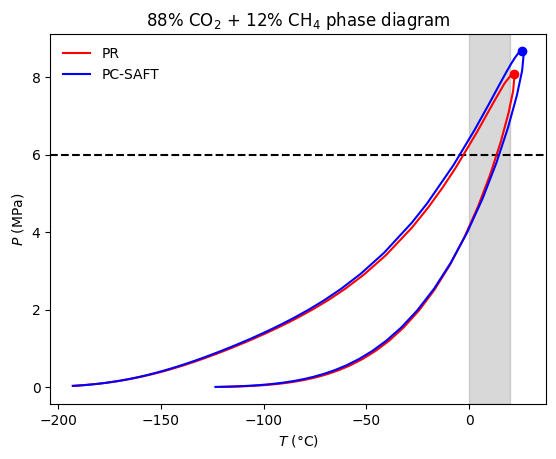

<Figure size 640x480 with 0 Axes>

In [1]:
#!/usr/bin/python
import sys
sys.path.insert(0,'../pycThermopack/')
import matplotlib.pyplot as plt
import numpy as np
from thermopack.extended_csp import ext_csp
from thermopack.pcsaft import pcsaft
from thermopack.tcPR import tcPR


tc_pr = tcPR("CO2,C1")
pcs = pcsaft("CO2,C1")

eoss = [tc_pr, pcs]
colors = ["r", "b"]

# Plot phase envelope
x = .88
z = np.array([x, 1-x])

plt.axvspan(0, 20, alpha=0.3, color='gray')

# plt.axvline(0, color='black', alpha=1, linestyle = '--')
# plt.axvline(20, color='black', alpha=1, linestyle = '--')
plt.axhline(6, color='black', alpha=1, linestyle = '--')

for i, eos in enumerate(eoss):
    label = eos.get_model_id()
    T, P, v = eos.get_envelope_twophase(1.0e4,
                                        z,
                                        maximum_pressure=1.5e7,
                                        calc_v=True)
    Tc, vc, Pc = eos.critical(z)
    plt.plot(T - 273, P*1.0e-6, color=colors[i], label=label)
    plt.plot([Tc- 273], [Pc*1.0e-6], color=colors[i], marker="o")
plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (°C)")
leg = plt.legend(loc="best", numpoints=1, frameon=False)
plt.title(str(int(100*x)) + "% CO$_2$ + " + str(int(100-100*x)) + "% CH$_4$ phase diagram")
# experimental data?
plt.show()
plt.clf()




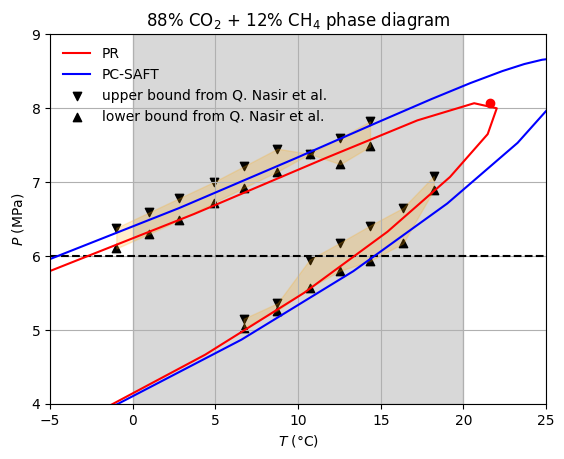

<Figure size 640x480 with 0 Axes>

In [94]:
#!/usr/bin/python
import sys
sys.path.insert(0,'../pycThermopack/')
import matplotlib.pyplot as plt
import numpy as np
from thermopack.extended_csp import ext_csp
from thermopack.pcsaft import pcsaft
from thermopack.tcPR import tcPR


tc_pr = tcPR("CO2,C1")
pcs = pcsaft("CO2,C1")

eoss = [tc_pr, pcs]
colors = ["r", "b"]

# Plot phase envelope
x = .88
z = np.array([x, 1-x])

plt.axvspan(0, 20, alpha=0.3, color='gray')

# plt.axvline(0, color='black', alpha=1, linestyle = '--')
# plt.axvline(20, color='black', alpha=1, linestyle = '--')
plt.axhline(6, color='black', alpha=1, linestyle = '--')


P1 = []
P2 = []
T1 = []
T2 = []
for i, eos in enumerate(eoss):
    label = eos.get_model_id()
    T, P, v = eos.get_envelope_twophase(1.0e4,
                                        z,
                                        maximum_pressure=1.5e7,
                                        calc_v=True)
    Tc, vc, Pc = eos.critical(z)
    plt.plot(T - 273, P*1.0e-6, color=colors[i], label=label)
    plt.plot([Tc- 273], [Pc*1.0e-6], color=colors[i], marker="o")
    if label == 'PR':
          P1.append(P*1.0e-6)
          T1.append(T-273.15)
    else:
          P2.append(P*1.0e-6)
          T2.append(T-273.15)
         
plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (°C)")
plt.title(str(int(100*x)) + "% CO$_2$ + " + str(int(100-100*x)) + "% CH$_4$ phase diagram")



# Bubble point
T = np.array([272.15, 274.15, 275.95, 278.05, 279.85, 281.90, 283.85, 285.70, 287.50, 289.50,291.35, 293.65])-273.15
lower_bound = [6.1,6.3,6.48,6.72,6.92,7.14,7.38,7.24,7.48]
upper_bound = [6.38,6.59,6.78,7,7.21,7.45,7.38,7.6,7.82]
plt.scatter(T[:-3],upper_bound, marker = 'v', color = 'black') 
plt.scatter(T[:-3],lower_bound, marker = '^', color = 'black') 
plt.fill_between(T[:-3],lower_bound,upper_bound, alpha = .2, color = 'orange')
# Dew point
T = np.array([272.15, 274.15, 275.95, 278.05, 279.85, 281.90, 283.85, 285.70, 287.50, 289.50,291.35, 293.65])-273.15
lower_bound = [5.03,5.26,5.57,5.8,5.93,6.17,6.89]
upper_bound = [5.15,5.36,5.95,6.18,6.41,6.65,7.08]
plt.scatter(T[4:-1],upper_bound, marker = 'v', color = 'black', label = 'upper bound from Q. Nasir et al.') 
plt.scatter(T[4:-1],lower_bound, marker = '^', color = 'black', label = 'lower bound from Q. Nasir et al.') 
plt.fill_between(T[4:-1],lower_bound,upper_bound, alpha = .2, color = 'orange')



leg = plt.legend(loc="best", numpoints=1, frameon=False)
plt.xlim(-5,25)
plt.ylim(4,9)
plt.grid()
plt.show()
plt.clf()




data taken from:

Q. Nasir, K.M. Sabil, K.K. Lau, Measurement of isothermal (vapor + liquid) equilibria, (VLE) for binary (CH4 + CO2) from T = (240.35 to 293.15) K and CO2 rich synthetic natural gas systems from T = (248.15 to 279.15) K, J. Nat. Gas Sci. Eng. 27 (Part 1) (2015) 158-167.

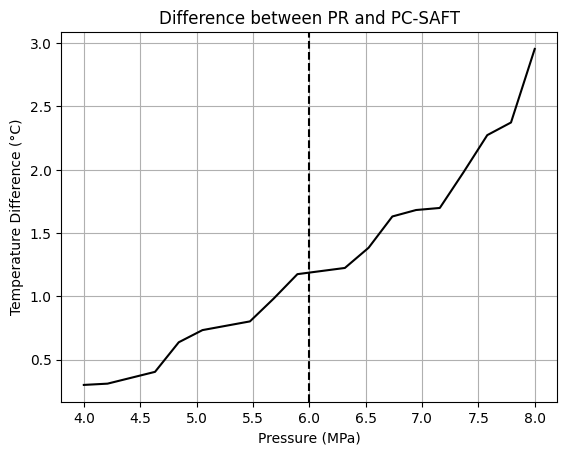

In [30]:
Temp1 = T1[0][29:36]
Press1 = P1[0][29:36]
Temp2 = T2[0][29:36]
Press2 = P2[0][29:36]

# Define a temperature range
press_range = np.linspace(4,8, 20)

# Interpolate pressures for both sets of temperatures
interp_temp1 = np.interp(press_range, Press1, Temp1)
interp_temp2 = np.interp(press_range, Press2, Temp2)

# Subtract interpolated pressures
diff_temp = interp_temp2 - interp_temp1

# Plot the difference
plt.plot(press_range, diff_temp, color = 'black')
plt.axvline(6,color = 'k', linestyle = '--')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Temperature Difference (°C)')
plt.title('Difference between PR and PC-SAFT')
plt.grid(True)
plt.show()